In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from a6_utils import *

# Exercise 1

### a

In [26]:
X = np.array([[3, 3, 7, 6], [4, 6, 6, 4]]) 
mi = 1/4 * (np.array([3, 4]) + np.array([3, 6]) + np.array([7, 6]) + np.array([6, 4]))
Xd = np.array([X[:, 0] - mi, X[:, 1] - mi, X[:, 2] - mi, X[:, 3] - mi])
C = np.array([[51, 1], [1, 4]]) * 1/3 
U, D, VT = np.linalg.svd(C)
print(U)
print(D)


[[-0.99977393 -0.02126216]
 [-0.02126216  0.99977393]]
[17.00708899  1.32624434]


### b, c

In [270]:
data = np.loadtxt("data/points.txt")
n = len(data)
mi = 1/n * np.cumsum(data, 0)[-1]
Xd = np.zeros(data.shape)
Xd[:,0] = data[:, 0] - mi[0]
Xd[:,1] = data[:, 1] - mi[1]
C = 1/(n-1) * np.matmul(Xd.T, Xd)
U, D, VT = np.linalg.svd(C)
e1 = np.zeros((2,2))
e1[0,:] = mi
e1[1,:] = mi + U[:,0] * np.sqrt(D[0])
e2 = np.zeros((2,2))
e2[0,:] = mi
e2[1,:] = mi + U[:,1] * np.sqrt(D[1])

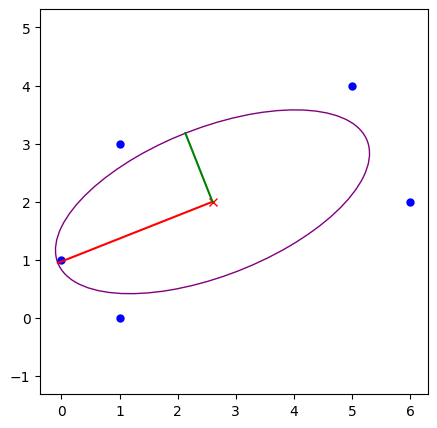

In [180]:
f = plt.figure(figsize=(5, 5))
f.add_subplot(1, 1, 1)
plt.axis('equal')
plt.plot(mi[0], mi[1], 'rx', markersize=6)
plt.plot(data[:,0], data[:,1], 'bo', markersize=5)
plt.plot(e1[:,0], e1[:,1], 'r-', markersize=5)
plt.plot(e2[:,0], e2[:,1], 'g-', markersize=5)
drawEllipse(mi, C, 1)

plt.show()

Question: What do you notice about the relationship between the eigenvectors
and the data? What happens to the eigenvectors if you change the data or add more
points?

Answer: Biggest eigen vector is in the dirrection of the highest variance, smallest in the direction of the smallest variance of the data. It changes acordingly

### d

[8.18975683 1.61024317]
[0.         8.18975683 9.8       ]
[0.         0.83568947 1.        ]


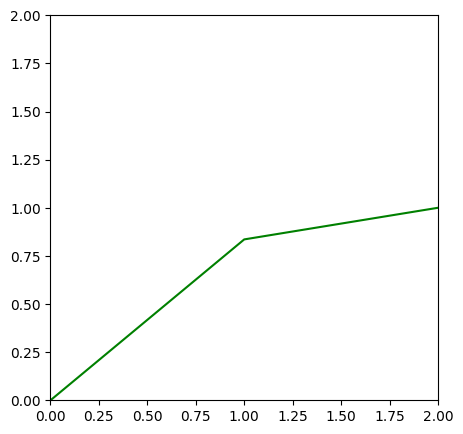

In [181]:
print(D)
cumulativeSum = np.zeros(3)
cumulativeSum[1:3] = np.cumsum(D)
print(cumulativeSum)
cumulativeSum /= np.cumsum(D)[-1]
print(cumulativeSum)

f = plt.figure(figsize=(5, 5))
f.add_subplot(1, 1, 1)
# plt.axis('equal')
plt.ylim((0,2))
plt.xlim((0, 2))
plt.plot(np.array([0,1,2]), cumulativeSum, 'g-', markersize=5)
plt.show()

### e, f

In [252]:
pcaData = np.matmul(U[:,0].T, Xd.T)
projectedData = np.matmul(np.reshape(U[:,0], (2,1)), np.reshape(pcaData, (1, 5))).T
projectedData[:,0] = projectedData[:,0] + mi[0]
projectedData[:,1] = projectedData[:,1] + mi[1]

point = np.array([6,6])
pcaPoint = np.matmul(U[:,0].T, point - mi)
projectedPoint = np.reshape(np.matmul(np.reshape(U[:,0], (2,1)), np.reshape(pcaPoint, (1, 1))), (2))
projectedPoint += mi

In [268]:
def closest(p, temp):
    smallestDistance = -1
    pp = temp[0,:]

    for p2 in temp:
        dist = np.sum((p-p2) * (p-p2))
        if smallestDistance < 0 or dist < smallestDistance:
            smallestDistance = dist
            pp = p2

    return pp

print(closest(point, data))
print(closest(projectedPoint, projectedData))

[5. 4.]
[5.54021325 3.16269992]


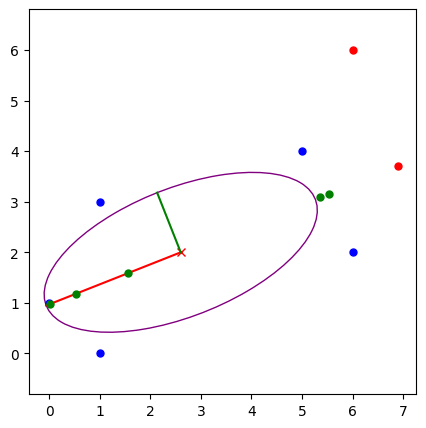

In [254]:
f = plt.figure(figsize=(5, 5))
f.add_subplot(1, 1, 1)
plt.axis('equal')
plt.plot(mi[0], mi[1], 'rx', markersize=6)
plt.plot(data[:,0], data[:,1], 'bo', markersize=5)
plt.plot(e1[:,0], e1[:,1], 'r-', markersize=5)
plt.plot(e2[:,0], e2[:,1], 'g-', markersize=5)
plt.plot(projectedData[:,0], projectedData[:,1], 'go', markersize=5)
plt.plot(point[0], point[1], 'ro', markersize=5)
plt.plot(projectedPoint[0], projectedPoint[1], 'ro', markersize=5)
drawEllipse(mi, C, 1)

plt.show()

Question: What happens to the reconstructed points? Where is the data projected
to?

Answer: The data is projected to the subspace of eigenvector with a bigger eigenvalue => data lines on that line